In [1]:
from google.colab import files
uploaded = files.upload()


Saving iris.data to iris (1).data


#Step 0: Import Packages and Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Data upoading

In [2]:
import pandas as pd

# Define column names for the dataset
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Load the dataset
df = pd.read_csv("iris.data", header=None, names=column_names)

# Display the first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Basic Data Overview

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
print("\nClass Distribution:")
print(df['class'].value_counts())


Class Distribution:
class
0    50
1    50
2    50
Name: count, dtype: int64


In [29]:
df.duplicated().any()

np.True_

In [28]:
#checked missing values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


## Step 2Exploratory Data Analysis (EDA)

<Figure size 1000x600 with 0 Axes>

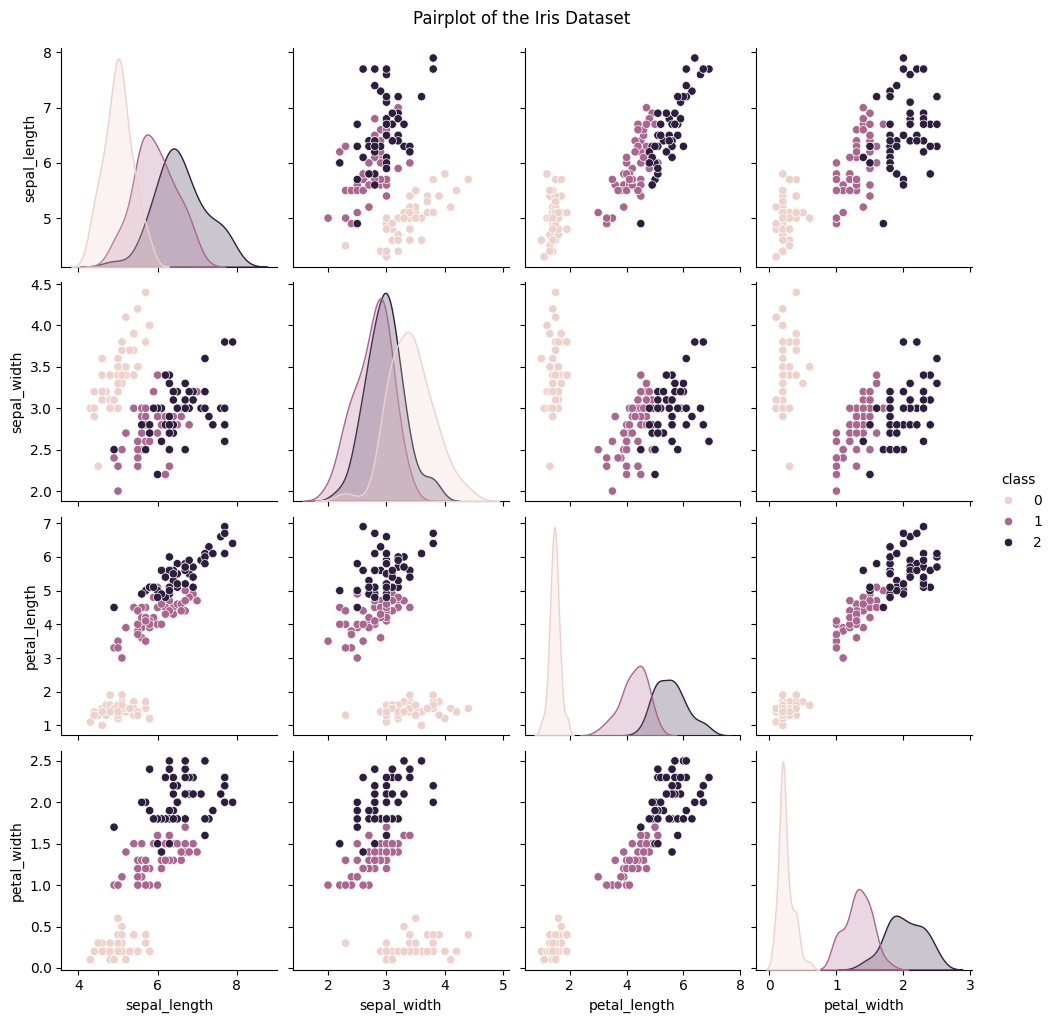

In [23]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue="class", diag_kind='kde')
plt.suptitle("Pairplot of the Iris Dataset", y=1.02)
plt.show()

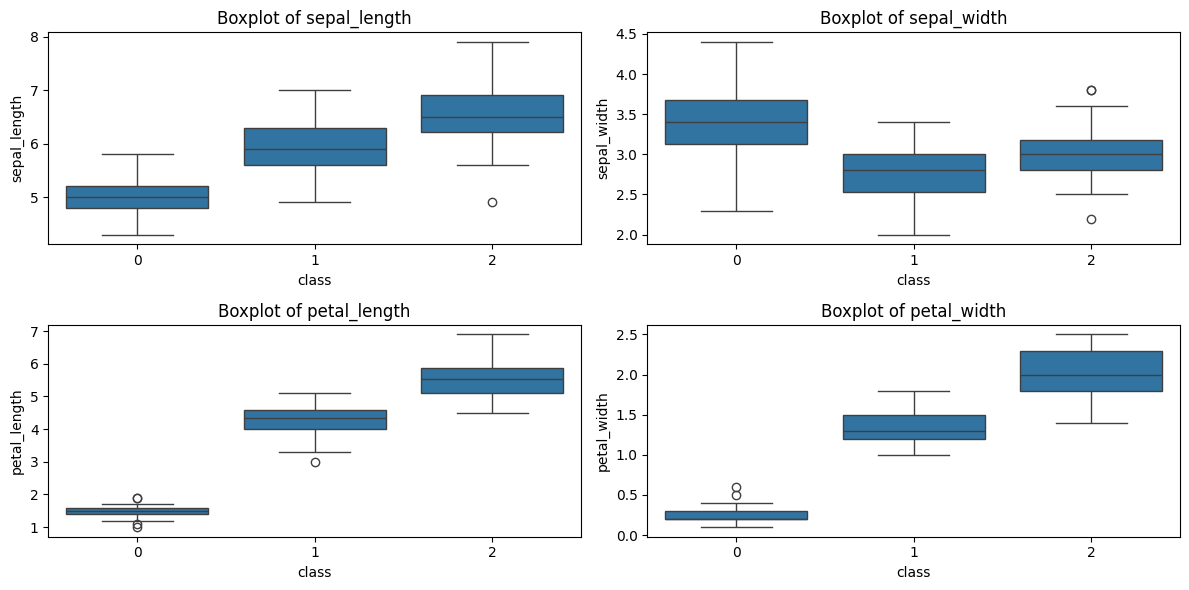

In [26]:
# Boxplots for each feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df['class'], y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

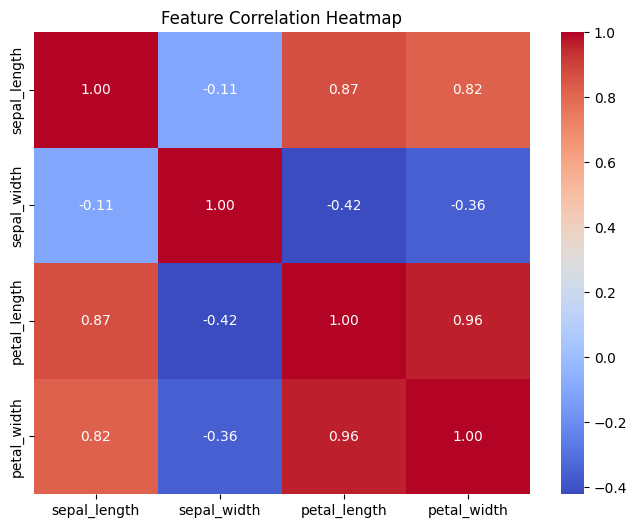

In [27]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

#Step 3Model building

## Activation Functions

In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

## Convert Labels to One-Hot Encoding

In [5]:
class_mapping = {label: idx for idx, label in enumerate(df["class"].unique())}
df["class"] = df["class"].map(class_mapping)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y_one_hot = np.eye(len(class_mapping))[y]

### Neural Network Parameters

In [6]:
input_neurons = X.shape[1]  # 4 features
hidden_neurons = 10  # Increased neurons for better learning
output_neurons = y_one_hot.shape[1]  # 3 classes

## Initialize Weights and Biases (He Initialization for ReLU)

In [7]:
np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons) * np.sqrt(2. / input_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons) * np.sqrt(2. / hidden_neurons)
b2 = np.zeros((1, output_neurons))

##Training Parameters

In [8]:
learning_rate = 0.01
epochs = 20000  # More training for better accuracy

In [15]:
for epoch in range(epochs):
    # Forward Propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)  # Softmax for multi-class classification

    # Compute Cross-Entropy Loss
    loss = -np.mean(np.sum(y_one_hot * np.log(A2 + 1e-9), axis=1))  # Add small value for stability

    # Backpropagation
    dZ2 = A2 - y_one_hot
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # Update Weights and Biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 2000 epochs
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.0547
Epoch 2000, Loss: 0.0538
Epoch 4000, Loss: 0.0530
Epoch 6000, Loss: 0.0522
Epoch 8000, Loss: 0.0516
Epoch 10000, Loss: 0.0509
Epoch 12000, Loss: 0.0503
Epoch 14000, Loss: 0.0497
Epoch 16000, Loss: 0.0492
Epoch 18000, Loss: 0.0487


## Evaluate Accuracy

In [16]:
A2_final = softmax(np.dot(relu(np.dot(X, W1) + b1), W2) + b2)
final_predictions = np.argmax(A2_final, axis=1)
actual_labels = np.argmax(y_one_hot, axis=1)

accuracy = accuracy_score(actual_labels, final_predictions) * 100
print(f"\nImproved Model Accuracy: {accuracy:.2f}%")


Improved Model Accuracy: 98.00%
